<a href="https://colab.research.google.com/github/SreelakshmiR43/Safety-First/blob/main/crime_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings 
warnings.filterwarnings("ignore")

In [43]:
import pandas as pd

data = pd.read_excel("/content/crime.xlsx")


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Crime Type        33 non-null     object        
 1   Location          33 non-null     object        
 2   Number of Crimes  33 non-null     int64         
 3   Latitude          33 non-null     float64       
 4   Longitude         33 non-null     float64       
 5   Date              33 non-null     datetime64[ns]
 6   Time              33 non-null     object        
 7   Location Type     33 non-null     object        
 8   Severity          33 non-null     object        
 9   Description       33 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 2.7+ KB


In [45]:
data_samples = data.sample(n=20,random_state = 42)

In [46]:
data_samples.index = np.arange(0,len(data_samples))

In [47]:
data_samples.isna().sum()

Crime Type          0
Location            0
Number of Crimes    0
Latitude            0
Longitude           0
Date                0
Time                0
Location Type       0
Severity            0
Description         0
dtype: int64

In [48]:
data_samples.dropna(axis=0,inplace=True)

In [49]:
data_samples.drop(["Date","Time","Location Type","Severity"],axis=1,inplace=True)


In [50]:
data_samples.head(10)

,Crime Type,Location,Number of Crimes,Latitude,Longitude,Description
0,Theft,Kanjirappally,1,9.595420,76.780844,A phone was stolen from a woman's purse in a c...
1,Theft,Kanjirappally,21,9.600600,76.771900,Pickpocketing reported at a local fair
2,Robbery,Kanjirappally,1,9.606287,76.774626,A jewelry store was robbed at gunpoint
3,Fraud,Kanjirappally,2,9.583800,76.779500,Credit card fraud reported at a local business
4,Assault,Kottayam,22,9.597600,76.539300,A group of people involved in a brawl
5,Burglary,Kottayam,14,9.583800,76.528700,Break-in at a rented apartment
6,Robbery,Kanjirappally,12,9.602100,76.780700,Armed robbery at a gas station
7,Assault,Kanjirappally,6,9.588500,76.771800,Domestic dispute turned violent
8,Robbery,Kanjirappally,10,9.595900,76.772400,Armed robbery at a jewelry store
9,Robbery,Kanjirappally,10,9.595900,76.772400,Armed robbery at a jewelry store


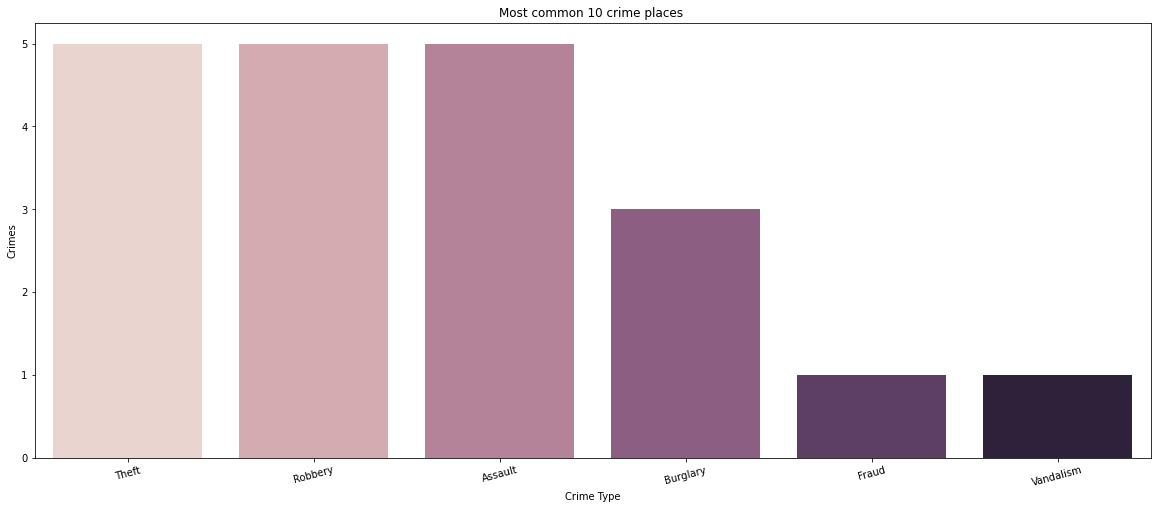

In [51]:
List = data_samples["Crime Type"].unique()

List2 = data_samples["Crime Type"]
Ratio = []

counted = Counter(List2) 
mostcommon = counted.most_common(10)
x,y = zip(*mostcommon)
x,y = list(x),list(y)
# %% 
plt.figure(figsize = (20,8))
ax = sns.barplot(x = x , y = y, palette = sns.cubehelix_palette(len(x)))
plt.xticks(rotation= 15)
plt.xlabel("Crime Type")
plt.ylabel("Crimes")
plt.title("Most common 10 crime places ")
plt.show()


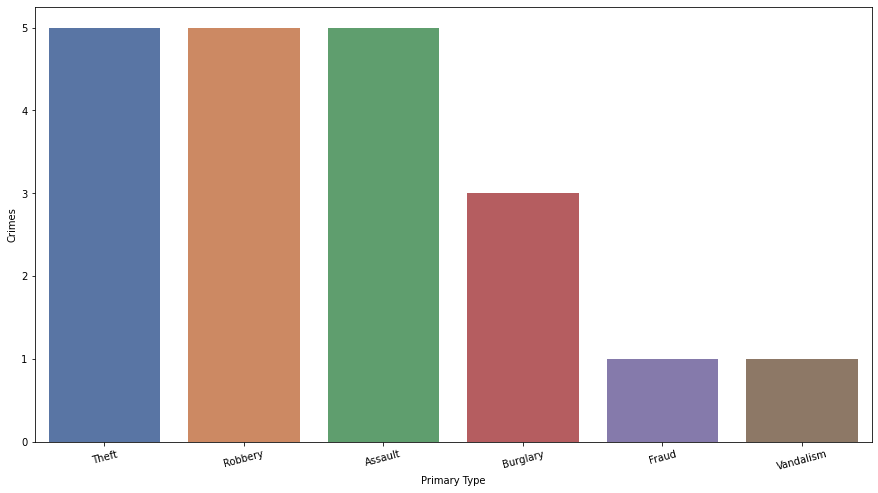

In [52]:
PrimaryType = data_samples["Crime Type"]
PrimaryTypeCounted = Counter(PrimaryType)
MostCommonPT = PrimaryTypeCounted.most_common(10)
x,y = zip(*MostCommonPT)
x,y  = list(x),list(y)

# %% 

plt.figure(figsize=(15,8))
ax = sns.barplot(x=x, y=y,palette = "deep")
plt.xticks(rotation= 15)
plt.xlabel("Primary Type")
plt.ylabel("Crimes")
plt.show()

In [53]:
import folium

# Create a map centered on the mean latitude and longitude
map_center = [data_samples['Latitude'].mean(), data_samples['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Iterate over unique values of number of crimes
for num in List:
    # Subset the data to only include rows with this number of crimes
    subset = data_samples[data_samples['Crime Type'] == num]
    
    # Create a feature group for this subset
    fg = folium.FeatureGroup(name=str(num))
    
    # Add a marker for each row in the subset
    for i, row in subset.iterrows():
        popup_text = "Latitude: {}<br>Longitude: {}<br>Crime Type: {}".format(row['Latitude'], row['Longitude'], num)
        marker = folium.Marker(location=[row['Latitude'], row['Longitude']], popup=popup_text)
        marker.add_to(fg)
    
    # Add the feature group to the map
    fg.add_to(m)

# Add layer control to the map
folium.LayerControl().add_to(m)

# Display the map
m
